# 0.0.Entendendo o Problema

- 1.Objetivo do Projeto:
    - 1.1.Classificar se o cliente vai ser inadimplente ou não.
    
    
- 2.Por que o projeto está sendo requistado?
    - 2.1.Acredito que seja pelo motivo de que a empresa está desenvolvendo um sistema de crédito automatico que de um limite adequado para a situação que o cliente está, pois caso a empresa de um emprestimo muito alto para clientes que vão ser possivelmente inadimplentes ela vai está pedenndo dinheiro, pois terá muito mais prejuizo do lucro com esse cliente, em contra partida também temos os clientes que não vão ser inadimplentes e esses sim deve receber um crédito alto para que se fidelizem com o banco e gastem mais, acredito que seja isso.
    
    
- 3.Qual métrica do negócio o projeto vai afetar?

    - 3.1.Em outras palavras onde o projeto vai ajudar a empresa a ganhar mais dinheiro? bem, acredito que os bancos ganhem dinheiro através dos juros pois quando emprestam uma quantidade x para o cliente tendem a receber uma quantidade y maior do que deram, ou seja, o projeto vai afetar na métrica de aumento do lucro da empresa e a queda do prejuizo, pois no fim uma das grandes formas dos bancos ganharem dinherio e através desse metódo.
        - Receita = juros que vem dos créditos
        - + Mais clientes(não inadimplente) + juros = Receita.
        
    - 3.2.No fim vamos buscar melhorar a métrica de juros, pois a empresa sabendo qual e o cliente com menos chance de ser inadimplente vai poder investir mais nele, e esse investimento ira trazer mais juros pois o cliente vai gasta mais, e isso vai fazer o faturamento da empresa aumentar.
 
 
- 4.Proposta de Solução
    - 4.1.Para resolver esse problema eu vou criar um modelo de Machine Learning que consiga indentificar quais são os clientes com maiores chances de serem inadimplentes, o modelo vai pedir as informações sobre o cliente e no fim retorna a classificação dele, para fazer isso será necessario passar por diversos ciclos para indentificação de problemas, pois cada problema dependendo da proporção vai gerar um novo ciclo, por exemplo certamente vamos está lidando com dados desbalaceandos, estão vamos precisa de um ciclo de balanceamento de dados.
    
- 5.O que será entrgue no fim?
    - 5.1.No fim dos ciclos do projeto eu espero ter um modelo que Tenha uma precisão de indentificar clientes inadimplente maior de 75%
    - 5.2.Um WebApp que vai funciona da seguiente forma:
        - input: Dados do clientes, as features que o modelo usou para indentificar se vai inadimplente ou não.
        - output: Uma foto que sendo verde significa que o cliente não vai ser inadimplente e caso ele for inadimplente retorna uma foto vermelha.
        
        
obs: Eu sei que existem outras formas dos bancos ganherem dinheiro, mas vou simplificar aqui falando apenas do juros, já que e a métrica que vamos buscar melhorar.

# 1.0.Imports

In [1]:
#Libraries Paddron
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
#--------------------
#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#--------------------
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scikitplot import metrics as mt
#--------------------
#Regex
import re
#--------------------


#Filter Warnings
import warnings
warnings.filterwarnings("ignore")
#-------------------

#Show all columns
pd.set_option('display.max_columns', None)

## 1.1.Load Data

In [2]:
df_raw = pd.read_csv('datasets/acquisition_train.csv')

## 1.2.Help Functions

In [3]:
def data_dimensions(df):
    print('Number of Rows: {}'.format(df.shape[0]))
    print('Number of Columns: {}'.format(df.shape[1]))
    return None

# 2.0.Data Description

In [4]:
df1 = df_raw.copy()
df1.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## 2.1.Data Dimensions

In [5]:
data_dimensions(df1)

Number of Rows: 45000
Number of Columns: 43


## 2.2.Data types

In [6]:
df1.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

## 2.3.Change types

In [7]:
#none to change

## 2.4.Check NA values

**Removendo colunas:**
Como estou na primeira fase do projeto, vou excluir as colunas com muitos valores nulos pois caso eu exclua os NA dessas colunas meu Datasets vai ficar sem dado para treina o modelo.

In [8]:
aux = pd.DataFrame(index=df1.isnull().sum().index, data=df1.isnull().sum().values).rename(columns={0:'Values'})
aux.sort_values(by='Values',ascending=False)

,Values
target_fraud,43478
last_amount_borrowed,29956
last_borrowed_in_months,29956
ok_since,26545
external_data_provider_credit_checks_last_2_year,22628
external_data_provider_credit_checks_last_year,15124
credit_limit,13800
n_issues,11544
facebook_profile,4458
marketing_channel,3578


## 2.5.FIll or Drop NA values

In [9]:
cols=['target_fraud','last_amount_borrowed','last_borrowed_in_months','ok_since','external_data_provider_credit_checks_last_2_year',
        'external_data_provider_credit_checks_last_year']
df1 = df1.drop(cols,axis=1)

#Remove NA Valeus
df1 = df1.dropna()

#reset_index
df1 = df1.reset_index(drop=True)

In [10]:
data_dimensions(df1)

Number of Rows: 20181
Number of Columns: 37


# 3.0.Data Filtering

In [11]:
df2 = df1.copy()
df2.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,2,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,1,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,3,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...
3,538c1908-bd80-b834-c3f0-238b4f536d3f,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,300.0,101.837040,0.915389,90.711273,0.44,61055.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,75024.28,False,JrdZzPZEa/YIIGwh8OdTKA==,kfWDI5wYFHdi9PtKFI9EPg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,9.0,9.0,05:27:02,169,gmail.com,2,21.0,teomar,811,"(-6.762413011455668, -35.13224579733013)",Website,787-1678197,160198.0,BR-SP,55266,"{'tags': ['c1', 'n3', 'n9']}",Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...
4,7552f149-5c7b-9e10-24a0-55978ee4ff5b,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,330.0,100.342564,0.491610,115.954187,0.33,42666.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,80024.60,True,orU7WJYGPT/xFwOXY1eBkw==,kT9iINxmEtNoxGqiEuuu1w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,7.0,7.0,17:58:42,184,outlook.com,3,37.0,orna,415,"(-8.39950627124774, -46.207331472395396)",Waiting-list,503-9012277,8658.0,BR-AC,36168,"{'tags': ['n15', 'c55', 'n14', 'n8', 'n3']}","Mozilla/5.0 (iPhone9,4; U; CPU iPhone OS 10_0_..."


## 3.1.Filter Rows

In [12]:
#Drop data with value Infinit
df2= df2[df2['reported_income']!= np.inf]

## 3.2.Filter columns

NameError: name 'python' is not defined

# 4.0.Data Preparation

In [14]:
df3 = df2.copy()
df3.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,2,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,1,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,3,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...
3,538c1908-bd80-b834-c3f0-238b4f536d3f,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,300.0,101.837040,0.915389,90.711273,0.44,61055.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,75024.28,False,JrdZzPZEa/YIIGwh8OdTKA==,kfWDI5wYFHdi9PtKFI9EPg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,9.0,9.0,05:27:02,169,gmail.com,2,21.0,teomar,811,"(-6.762413011455668, -35.13224579733013)",Website,787-1678197,160198.0,BR-SP,55266,"{'tags': ['c1', 'n3', 'n9']}",Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...
4,7552f149-5c7b-9e10-24a0-55978ee4ff5b,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,330.0,100.342564,0.491610,115.954187,0.33,42666.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,80024.60,True,orU7WJYGPT/xFwOXY1eBkw==,kT9iINxmEtNoxGqiEuuu1w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,7.0,7.0,17:58:42,184,outlook.com,3,37.0,orna,415,"(-8.39950627124774, -46.207331472395396)",Waiting-list,503-9012277,8658.0,BR-AC,36168,"{'tags': ['n15', 'c55', 'n14', 'n8', 'n3']}","Mozilla/5.0 (iPhone9,4; U; CPU iPhone OS 10_0_..."


In [15]:
#Clear space in data
df3['target_default'] = df3['target_default'].apply(lambda x: str(x).strip())

#change text to number
aux = {'False':0,'True':1}
df3['target_default'] = df3['target_default'].map(aux)

# 5.0.Feature Selection

**Removendo colunas categoricas:**
Vou remover todas as colunas do tipo object por agora, pois e necessario fazer uma limpeza de dados mais aprofundada nelas e no processo de Data Preparation e necessario fazer um encondig especifico para cada variavel, eu sei que elas são importantes e eu não vou descartalas vou apenas deixa para usar depois que fizer um tratamento mais adequado, que por agora não é meu objetivo já que nesse primeiro passo o objetivo e apenas ter uma visão geral do problema.

In [16]:
df4 = df3.copy()

In [17]:
cols_number = df4.select_dtypes(include=['int64','float64']).columns
df4 = df4[cols_number]

In [18]:
X = df4.drop('target_default',axis=1)
y = df4['target_default']

# 6.0.Machine Learning Models

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

## 6.1.GaussianNB

In [20]:
model_gaussian = GaussianNB()

#train model
model_gaussian.fit(X_train,y_train)

#predict
result_gausian = model_gaussian.predict(X_test)

## 6.2.LogisticRegression

In [21]:
model_logic = LogisticRegression()

#train data
model_logic.fit(X_train,y_train)

#predict
result_logic = model_logic.predict(X_test)

# 7.0.Perfomance

In [22]:
#Model Gausian
print(classification_report(result_gausian,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      6044
           1       0.00      0.00      0.00         0

    accuracy                           0.84      6044
   macro avg       0.50      0.42      0.46      6044
weighted avg       1.00      0.84      0.91      6044



In [23]:
#Model Logistic
print(classification_report(result_logic,y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      6044
           1       0.00      0.00      0.00         0

    accuracy                           0.84      6044
   macro avg       0.50      0.42      0.46      6044
weighted avg       1.00      0.84      0.91      6044



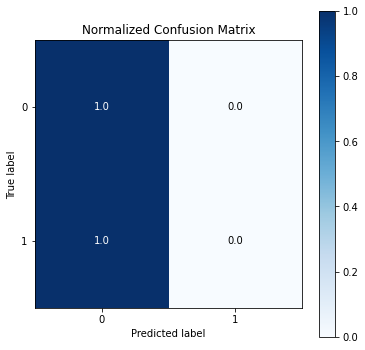

In [26]:
#Model Gausian
mt.plot_confusion_matrix(y_test, result_gausian, normalize=True, figsize=(6,6));

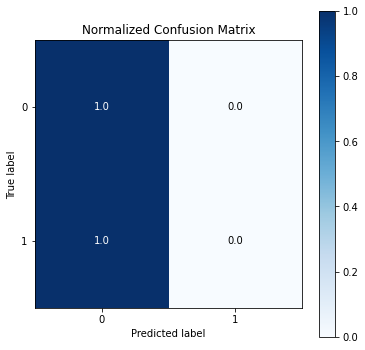

In [27]:
#Model Logic
mt.plot_confusion_matrix(y_test, result_logic, normalize=True, figsize=(6,6));

# Conclusion
**O que foi feito nesta etapa:**
- O objetivo dessa etapa era apenas explorar os dados, saber os problemas que vou enfrentar nas proximas etapas e já ter uma ideia de como vou lidar com esses problemas, algumas coisas que notei e que vou precisar melhorar nos proximos ciclos:
    - Limpeza de dados, pois tem muitas features com valores sujos como lat e long que estão juntos na mesma coluna
    - NA values, existem colunas com muitos valores NA que vão precisar ser tratados.
    - Na parte de Data preparation, pelo fato de ter muitos valores distintos, será necessario fazer um encondig unico para cada viariavel, mas isso e pra mais tarde
    - Estou lidando com dados desbalacenados, o modelos tiverem uma falsa acuracia de 84% sendo que errão tudo quando era para dizer se era inadimplente ou não, claramente um envizamento do modelo pela quantidade de dados true que temos.
    - Percebi que preciso de uma métrica melhor, pois na acuracia não vou poder confiar.

**O que sera feito na proxima etapa?**
- Na proxima eu vou limpar os dados e arrumar as features, preparar a cross_validation e excluir as colunas com muitos valores NA e preencher as que não possui tantos valores nulos.

**Proximo passo:**
- Data Cleaning